In [1]:
# 基本处理 1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

movies = pd.read_csv('movies_credits.csv')
# exp_rate = pd.read_csv('dollar.csv')

In [2]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
status                  4803 non-null object
tagline                 3959 non-null object
title_x                 4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
movie_id                4803 non-null int64
title_y                 4803 non-null o

In [3]:
movies.notnull().count()

budget                  4803
genres                  4803
homepage                4803
keywords                4803
original_language       4803
original_title          4803
overview                4803
popularity              4803
production_companies    4803
production_countries    4803
release_date            4803
revenue                 4803
runtime                 4803
status                  4803
tagline                 4803
title_x                 4803
vote_average            4803
vote_count              4803
movie_id                4803
title_y                 4803
actors                  4803
director                4803
writer                  4803
producer                4803
dtype: int64

In [4]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04
movie_id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
producer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 1980为基准
# expRate = exp_rate.rate.mean()

In [6]:
# 列处理 2

# 没有
movies.drop(columns = ['overview', 'runtime', 'tagline', 'keywords', 
                       'homepage', 'movie_id', 'status'], inplace = True)

movies.drop(columns = ['writer', 'producer'], inplace = True)

movies['release_date'] = pd.to_datetime(movies['release_date'])

# original_table table_x table_y数据重复
movies.rename(columns={'original_title':'movie_title'}, inplace = True)
movies.drop(columns = ['title_x', 'title_y'], inplace = True)

movies['language'] = ''
movies['year'] = ''
movies['month'] = ''
movies['generation'] = ''
movies['main_country'] = ''
movies['main_genre'] = ''
movies['main_company'] = ''
movies['difference'] = ''
movies['ifProfitable'] = ''

In [7]:
# 针对语言进行分类

i = 0
for l in movies.original_language:
    if l == "en":
        movies.loc[i, 'language'] = 0
    else:
        movies.loc[i, 'language'] = 1
    i += 1

In [8]:
movies.groupby('language').count()

,budget,genres,original_language,movie_title,popularity,production_companies,production_countries,release_date,revenue,vote_average,...,actors,director,year,month,generation,main_country,main_genre,main_company,difference,ifProfitable
language,,,,,,,,,,,,,,,,,,,,,
0,4505,4505,4505,4505,4505,4505,4505,4504,4505,4505,...,4505,4475,4505,4505,4505,4505,4505,4505,4505,4505
1,298,298,298,298,298,298,298,298,298,298,...,298,298,298,298,298,298,298,298,298,298


In [9]:
# 提取上映年份 / 月份

movies.release_date.dropna(inplace = True)
movies['year'] = movies['release_date'].dt.year
movies['month'] = movies['release_date'].dt.month

In [10]:
# 针对年份进行编码

i = 0
for y in movies.year:
    if y <= 1970:
        movies.loc[i, 'generation'] = 1
    elif (y >= 1971) & (y <= 1980):
        movies.loc[i, 'generation'] = 2
    elif (y >= 1981) & (y <= 1990):
        movies.loc[i, 'generation'] = 3
    elif (y >= 1991) & (y <= 2000):
        movies.loc[i, 'generation'] = 4
    elif (y >= 2001) & (y <= 2005):
        movies.loc[i, 'generation'] = 5
    elif (y >= 2006) & (y <= 2010):
        movies.loc[i, 'generation'] = 6
    elif (y >= 2011) & (y <= 2016):
        movies.loc[i, 'generation'] = 7
    else:
        movies.loc[i, 'generation'] = 0
    i += 1
    

In [11]:
movies.groupby('generation').count()

,budget,genres,original_language,movie_title,popularity,production_companies,production_countries,release_date,revenue,vote_average,...,actors,director,language,year,month,main_country,main_genre,main_company,difference,ifProfitable
generation,,,,,,,,,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,1,2,2,...,2,1,2,1,1,2,2,2,2,2
1,155,155,155,155,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
2,119,119,119,119,119,119,119,119,119,119,...,119,119,119,119,119,119,119,119,119,119
3,285,285,285,285,285,285,285,285,285,285,...,285,285,285,285,285,285,285,285,285,285
4,915,915,915,915,915,915,915,915,915,915,...,915,913,915,915,915,915,915,915,915,915
5,976,976,976,976,976,976,976,976,976,976,...,976,968,976,976,976,976,976,976,976,976
6,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,...,1131,1124,1131,1131,1131,1131,1131,1131,1131,1131
7,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,...,1220,1208,1220,1220,1220,1220,1220,1220,1220,1220


In [12]:
movies.drop(movies[movies.revenue == 0].index, inplace = True)

In [13]:
movies.dropna(axis = 0, inplace = True)

In [14]:
# movies.describe(include = object)
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,3374.0,3.890462e+07,4.421003e+07,0.000000,8.550000e+06,2.500000e+07,5.200000e+07,3.800000e+08
popularity,3374.0,2.827716e+01,3.562634e+01,0.019984,9.970888e+00,1.976746e+01,3.643038e+01,8.755813e+02
revenue,3374.0,1.170999e+08,1.835159e+08,5.000000,1.537595e+07,5.182193e+07,1.401717e+08,2.787965e+09
vote_average,3374.0,6.309010e+00,8.822266e-01,0.000000,5.800000e+00,6.300000e+00,6.900000e+00,1.000000e+01
vote_count,3374.0,9.449810e+02,1.393070e+03,0.000000,1.610000e+02,4.410000e+02,1.091750e+03,1.375200e+04
language,3374.0,4.238293e-02,2.014911e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
year,3374.0,2.001851e+03,1.312246e+01,1916.000000,1.998000e+03,2.005000e+03,2.010000e+03,2.016000e+03
month,3374.0,6.979846e+00,3.357741e+00,1.000000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
generation,3374.0,5.172199e+00,1.582868e+00,1.000000,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00


In [15]:
# 分语言对budget进行填充
# 除开0算平均值
languages = movies.language.unique()
for l in languages:
    lmean = movies[(movies.language == l) & (movies.budget != 0)].budget.mean()
    lBudget = movies[movies.language == l]
    lBudget.budget.replace(0, lmean, inplace = True)
    movies[movies.language == l] = lBudget

In [16]:
revenueTop100 = movies.revenue.sort_values(ascending = False).head(100).index
moviesRevenueTop100 = movies.loc[revenueTop100]

In [17]:
movies.drop(movies[movies.production_companies == '[]'].index, inplace = True)
movies.drop(movies[movies.production_countries == '[]'].index, inplace = True)
movies.drop(movies[movies.actors == '[]'].index, inplace = True)

In [18]:
# main country

for i in movies.production_countries.index:
    c = movies.loc[i, 'production_countries'].replace('[', '').replace(']', '').replace('.', '').replace('\'', '').replace(' ', '_').replace(',_', ' ')
    movies.loc[i, 'main_country'] = c.split(' ')[0]

In [19]:
# main genres

for i in movies.genres.index:
    c = movies.loc[i, 'genres'].replace('[', '').replace(']', '').replace('.', '').replace('\'', '').replace(' ', '_').replace(',_', ' ')
    movies.loc[i, 'main_genre'] = c.split(' ')[0]

In [20]:
# main companies

for i in movies.production_companies.index:
    c = movies.loc[i, 'production_companies'].replace('[', '').replace(']', '').replace('.', '').replace('\'', '').replace(' ', '_').replace(',_', ' ')
    movies.loc[i, 'main_company'] = c.split(' ')[0]

In [21]:
movies['budget'] = movies['budget'].astype('int64')
movies['year'] = movies['year'].astype('int64')
movies['month'] = movies['month'].astype('int64')

In [22]:
for col in movies.columns:
    if movies[col].dtype == object:
        count = 0
        count = [count + 1 for x in movies[col] if x == '[]']
        print(col + ' ' + str(sum(count)))

genres 0
original_language 0
movie_title 0
production_companies 0
production_countries 0
actors 0
director 0
main_country 0
main_genre 0
main_company 0
difference 0
ifProfitable 0


In [23]:
movies.drop(columns = ['genres', 'production_companies', 'production_countries', 'release_date'], inplace = True)

In [24]:
# 求差值

for i in movies.revenue.index:
    movies.loc[i, 'difference'] = movies.loc[i, 'revenue'] - movies.loc[i, 'budget']

In [25]:
# 盈利编码

for i in movies.difference.index:
    if movies.loc[i, 'difference'] > 0:
        movies.loc[i, 'ifProfitable'] = 1
    else:
        movies.loc[i, 'ifProfitable'] = 0

In [26]:
movies.groupby('main_company').mean().sort_values('revenue', ascending = False)

,budget,popularity,revenue,vote_average,vote_count,language,year,month,generation,difference,ifProfitable
main_company,,,,,,,,,,,
Patalex_IV_Productions_Limited,150000000.0,101.250416,8.959210e+08,7.500,5608.00,0.0,2005.0,11.00,5.00,7.459210e+08,1.0
Marvel_Studios,175000000.0,134.390332,7.301826e+08,7.060,7091.10,0.0,2012.4,5.40,6.80,5.551826e+08,1.0
1492_Pictures,111250000.0,90.580987,7.043868e+08,7.125,5086.50,0.0,2005.0,8.75,5.50,5.931368e+08,1.0
WingNut_Films,132300000.0,85.515415,6.709462e+08,7.330,4891.50,0.0,2006.2,11.20,5.70,5.386462e+08,0.9
Pixar_Animation_Studios,97250000.0,81.276578,6.365889e+08,7.575,5516.75,0.0,2001.5,7.50,4.75,5.393389e+08,1.0
...,...,...,...,...,...,...,...,...,...,...,...
Film_Council,28.0,9.670031,1.400000e+01,5.900,173.00,0.0,2001.0,12.00,5.00,-1.400000e+01,0.0
Cookout_Productions,16000000.0,0.830596,1.200000e+01,4.600,10.00,0.0,2004.0,9.00,5.00,-1.599999e+07,0.0
Filmhuset_Gruppen,10.0,1.617943,1.100000e+01,6.900,26.00,1.0,2013.0,8.00,7.00,1.000000e+00,1.0


In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3319 entries, 0 to 4798
Data columns (total 18 columns):
budget               3319 non-null int64
original_language    3319 non-null object
movie_title          3319 non-null object
popularity           3319 non-null float64
revenue              3319 non-null int64
vote_average         3319 non-null float64
vote_count           3319 non-null int64
actors               3319 non-null object
director             3319 non-null object
language             3319 non-null int64
year                 3319 non-null int64
month                3319 non-null int64
generation           3319 non-null int64
main_country         3319 non-null object
main_genre           3319 non-null object
main_company         3319 non-null object
difference           3319 non-null int64
ifProfitable         3319 non-null int64
dtypes: float64(2), int64(9), object(7)
memory usage: 652.7+ KB


In [28]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,3319.0,4.102961e+07,4.361910e+07,1.000000e+00,1.200000e+07,2.800000e+07,5.400000e+07,3.800000e+08
popularity,3319.0,2.870470e+01,3.576204e+01,3.707300e-02,1.042358e+01,2.023053e+01,3.676603e+01,8.755813e+02
revenue,3319.0,1.189528e+08,1.844567e+08,5.000000e+00,1.677858e+07,5.358740e+07,1.416468e+08,2.787965e+09
vote_average,3319.0,6.316842e+00,8.738117e-01,0.000000e+00,5.800000e+00,6.400000e+00,6.900000e+00,1.000000e+01
vote_count,3319.0,9.602022e+02,1.399489e+03,0.000000e+00,1.770000e+02,4.530000e+02,1.112500e+03,1.375200e+04
language,3319.0,4.188008e-02,2.003453e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
year,3319.0,2.001830e+03,1.319362e+01,1.916000e+03,1.998000e+03,2.005000e+03,2.010000e+03,2.016000e+03
month,3319.0,6.983127e+00,3.358931e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
generation,3319.0,5.172341e+00,1.588975e+00,1.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00
difference,3319.0,7.792320e+07,1.570422e+08,-1.657101e+08,-6.568760e+05,2.459800e+07,9.417259e+07,2.550965e+09


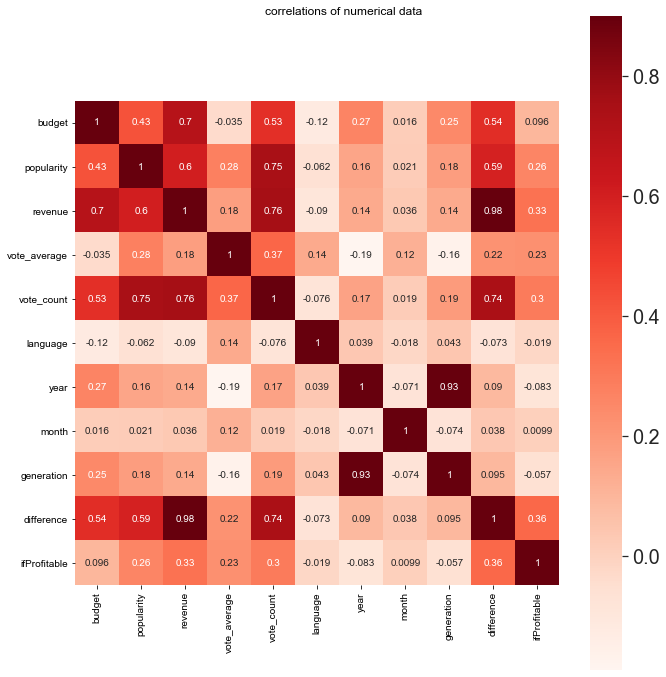

In [29]:
plt.subplots(figsize = (10, 10))
plt.suptitle('correlations of numerical data')
sns.set(font_scale=1.8)
sns.heatmap(movies.corr(), annot = True, cmap = 'Reds', vmax = .9, square = True, annot_kws={"size": 10})
plt.tight_layout()
plt.savefig('movie_correlation.jpg')

# 成本和票房之间的相关性很高，高成本电影更容易获得高票房
# 受欢迎程度越高，就会有更多的人给电影投票
# 票房越高，给电影投票的人也会更多
# 受欢迎程度和电影的票房有一定的关系
# 投票人数和电影成本也有一定的关系
# vote_count 和popularity相关性很大

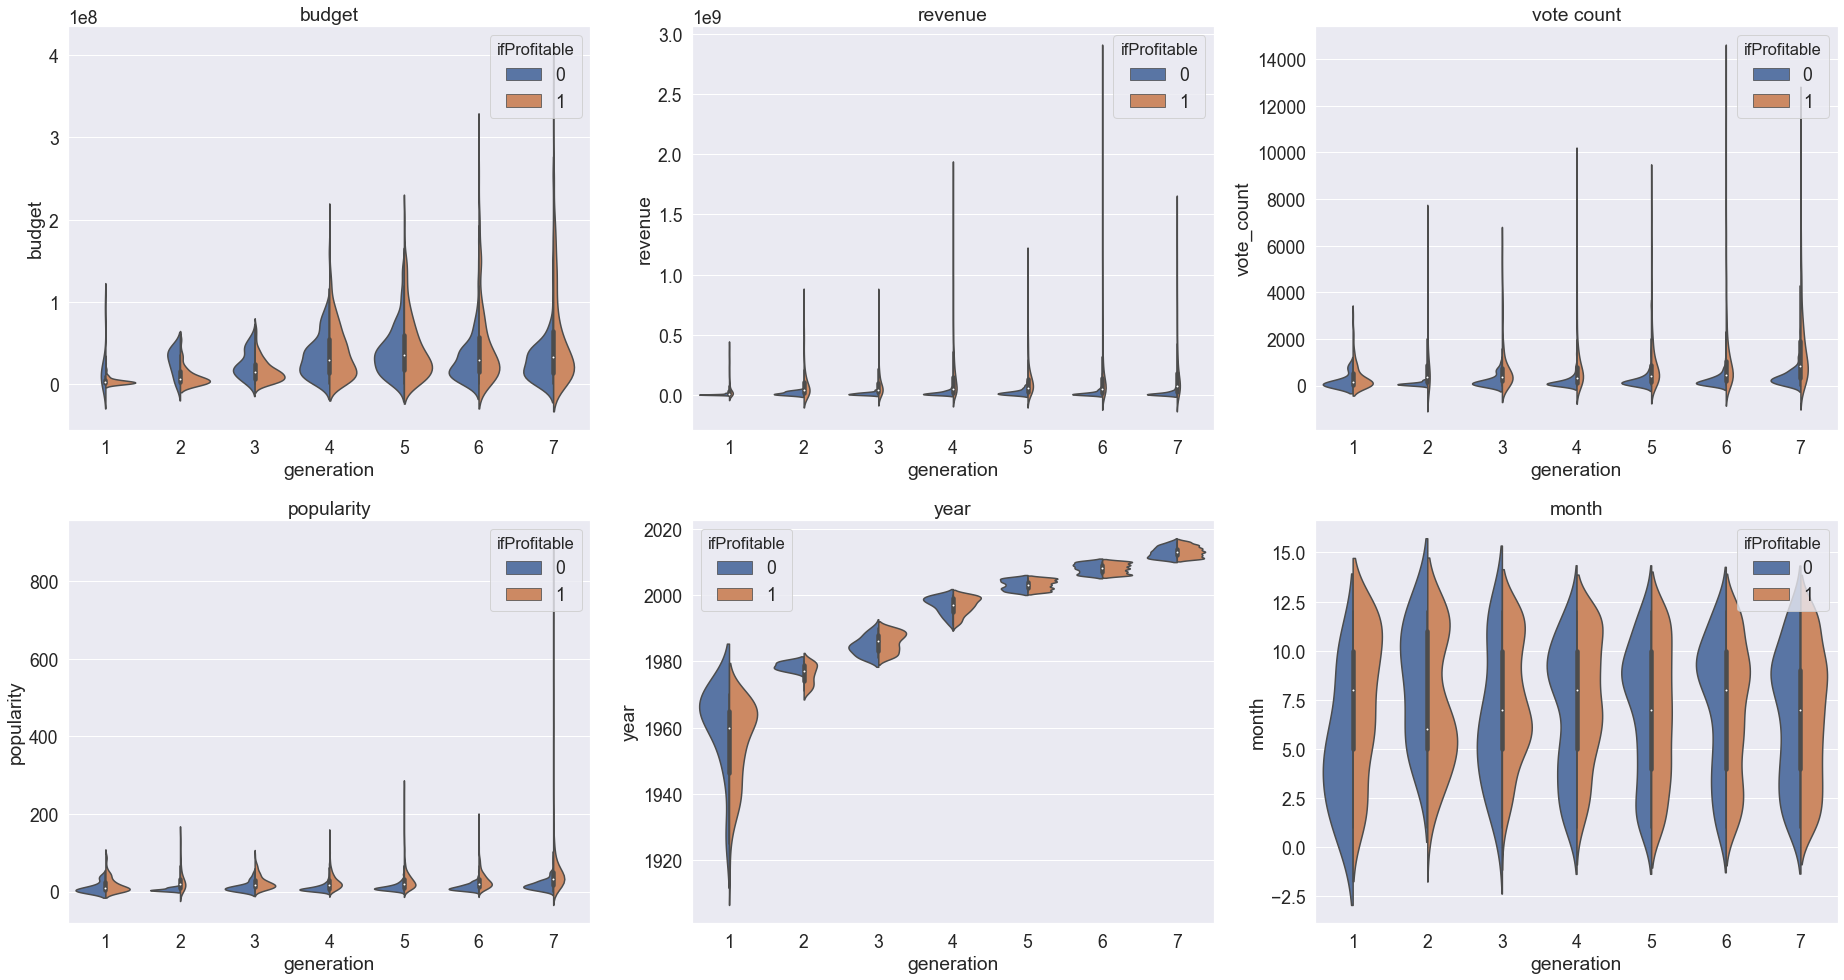

In [30]:
plt.subplots(figsize = (26,14))
plt.title('violin plots for individual columns')
sns.set(font_scale=1.6)
plt.subplot(2,3,1)
sns.violinplot(data = movies, x = 'generation', y = 'budget', hue = 'ifProfitable', split = True)
plt.title('budget')
# 成本跨度很大，但大多数电影的成本不算太高

plt.subplot(2,3,2)
sns.violinplot(data = movies, x = 'generation', y = 'revenue', hue = 'ifProfitable', split = True)
plt.title('revenue')
# 电影票房差别同样很大 基本集中在0.0 到0.5-1.0的范围内

# plt.subplot(2,4,3)
# sns.violinplot(data = movies.vote_average, color = 'dodgerblue')
# plt.title('vote average')
# # 大部分电影的投票分数都集中在6-7之间
# # 满分电影为Dancer, Texas Pop. 81
# # Mi America, Naturally Native无人投票 vote_average == 0

plt.subplot(2,3,3)
sns.violinplot(data = movies, x = 'generation', y = 'vote_count', hue = 'ifProfitable', split = True)
plt.title('vote count')
# 大多数电影的投票人数比较少 极差大

plt.subplot(2,3,4)
sns.violinplot(data = movies, x = 'generation', y = 'popularity', hue = 'ifProfitable', split = True)
plt.title('popularity')
# 大多数电影的流行度集中在100-200，极少数电影的流行度极高
# 流行度最高的是Minions 小黄人

plt.subplot(2,3,5)
sns.violinplot(data = movies, x = 'generation', y = 'year', hue = 'ifProfitable', split = True)
plt.title('year')
# 该数据的电影主要是1998-2011左右的

plt.subplot(2,3,6)
sns.violinplot(data = movies, x = 'generation', y = 'month', hue = 'ifProfitable', split = True)
plt.title('month')
# 数据集中的电影主要是4-10月的
# 美国夏季档期：从每年5月下旬至9月4日为止，它的时间跨度长，又正值暑期，自然是所片商最为重视的档期。 【百度】
# 中国暑期档：一般泛指每年6月-9月的电影档期。 【百度】
plt.tight_layout()
plt.savefig('individual_exploration_violin.jpg')

In [31]:
movies.loc[movies.ifProfitable == 0].count()

budget               869
original_language    869
movie_title          869
popularity           869
revenue              869
vote_average         869
vote_count           869
actors               869
director             869
language             869
year                 869
month                869
generation           869
main_country         869
main_genre           869
main_company         869
difference           869
ifProfitable         869
dtype: int64

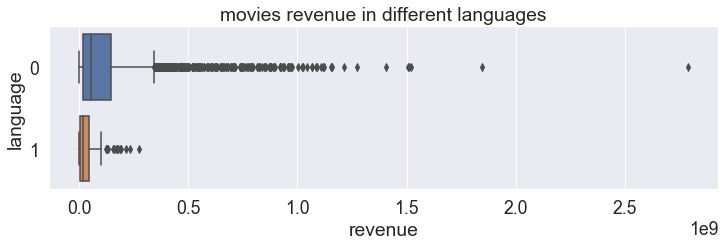

In [32]:
plt.subplots(figsize = (12, 3))

sns.boxplot(x = 'revenue', y = 'language', data = movies, orient = 'h').set_title('movies revenue in different languages')

plt.savefig('language_boxplot.jpg')
# 验证上文 语言与票房的关系
# 数量大多集中在0周围

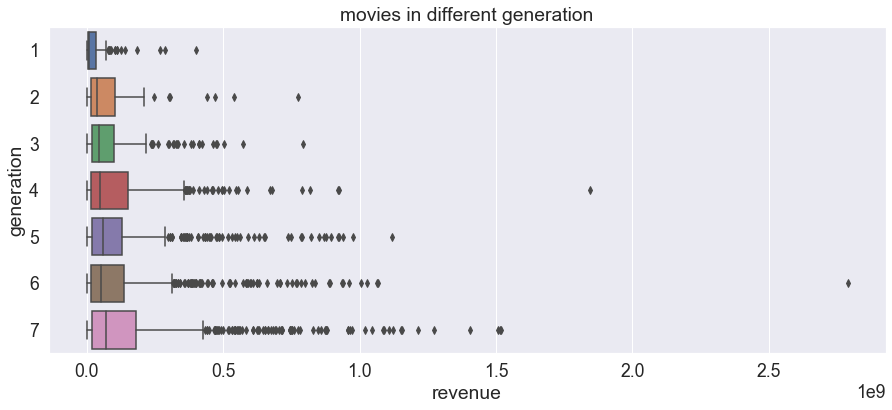

In [33]:
plt.subplots(figsize = (15, 6))

sns.boxplot(x = 'revenue', y = 'generation', data = movies, orient = 'h').set_title('movies in different generation')

plt.savefig('generation_boxplot.jpg')

# 票房最高的电影为2005<=y<=10的Avatar，其次是1991<=y<=2000的Titanic
# 2011-2016的电影票房普遍偏高
# 总体来看电影票房呈增长趋势 //和经济增长与通货膨胀有一定关系？
# 人们的总体生活水平也决定了现在人们在电影等娱乐方面的支出有一定的增加

In [34]:
movies.sort_values('difference', ascending = False).head()

,budget,original_language,movie_title,popularity,revenue,vote_average,vote_count,actors,director,language,year,month,generation,main_country,main_genre,main_company,difference,ifProfitable
0,237000000,en,Avatar,150.437577,2787965087,7.2,11800,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron,0,2009,12,6,United_States_of_America,Action,Ingenious_Film_Partners,2550965087,1
25,200000000,en,Titanic,100.025899,1845034188,7.5,7562,"['Kate Winslet', 'Leonardo DiCaprio', 'Frances...",James Cameron,0,1997,11,4,United_States_of_America,Drama,Paramount_Pictures,1645034188,1
28,150000000,en,Jurassic World,418.708552,1513528810,6.5,8662,"['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan...",Colin Trevorrow,0,2015,6,7,United_States_of_America,Action,Universal_Studios,1363528810,1
44,190000000,en,Furious 7,102.322217,1506249360,7.3,4176,"['Vin Diesel', 'Paul Walker', 'Dwayne Johnson'...",James Wan,0,2015,4,7,Japan,Action,Universal_Pictures,1316249360,1
16,220000000,en,The Avengers,144.448633,1519557910,7.4,11776,"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",Joss Whedon,0,2012,4,7,United_States_of_America,Science_Fiction,Paramount_Pictures,1299557910,1


In [35]:
from scipy import stats

In [36]:
# 尝试建立新的dataframe 关于每类电影的票房平均值

genres = []
for g in movies.main_genre.unique():
    genres.append(g)

genMean = []
for g in genres:
    gmean = movies[(movies.main_genre == g)].revenue.mean()
    genMean.append(gmean)

genDict = dict(zip(genres, genMean))
genData = pd.DataFrame(genDict, index = [0])
genData = genData.T.reset_index().rename(columns = {'index' : 'genres', 0 : 'meanRevenue'})

genData.head()

,genres,meanRevenue
0,Action,1.540750e+08
1,Adventure,2.455996e+08
2,Fantasy,1.779838e+08
3,Animation,3.033565e+08
4,Science_Fiction,1.997302e+08


1. 进行原始数据探索与分析，并且给出自己的见解。
    - 数据集本身英文电影较多，分析之后不能将结果完全应用于非英文电影
    - 电影本身数据时间跨度大，所给的票房/成本数据和经济因素也有一定的影响
    - 数据集的每类电影数据量差异较大，可能造成偏差
    
2. 什么样的电影最受欢迎呢？ 
    - Western Documentary Drama Foreign评分较高
        - 除了Drama，其他评分人数较少，不能完全作为参照
    - 没有特定的流行月份
    - Animation Adventure Family 票房最高
    
3. 通过可视化探索来探讨受众喜好与电影那些因素有关？并说明原因。 
    - 目前看来可能于电影种类有一定的关系
    - 从heatmap上的相关性系数来看，还没有找到关系很大的
    
4. 对重要的特征进行清理和预处理。 
    - 提取了年份和月份，也提取了主要的国家，制片公司
    
<!-- 5. 应用机器学习工具来预测不同电影的票房收入。  -->

6. 如果你是一个制片人，导演，编剧，你会如何努力的去创作一部深受当下影迷热捧的高票房电影？
    - 总体看来Action Science_Fiction票房更高
    - 英文电影的票房总体来说比非英语电影的票房高
    

In [37]:
gen1movies = movies.loc[movies.generation == 1]
gen2movies = movies.loc[movies.generation == 2]
gen3movies = movies.loc[movies.generation == 3]
gen4movies = movies.loc[movies.generation == 4]
gen5movies = movies.loc[movies.generation == 5]
gen6movies = movies.loc[movies.generation == 6]
gen7movies = movies.loc[movies.generation == 7]

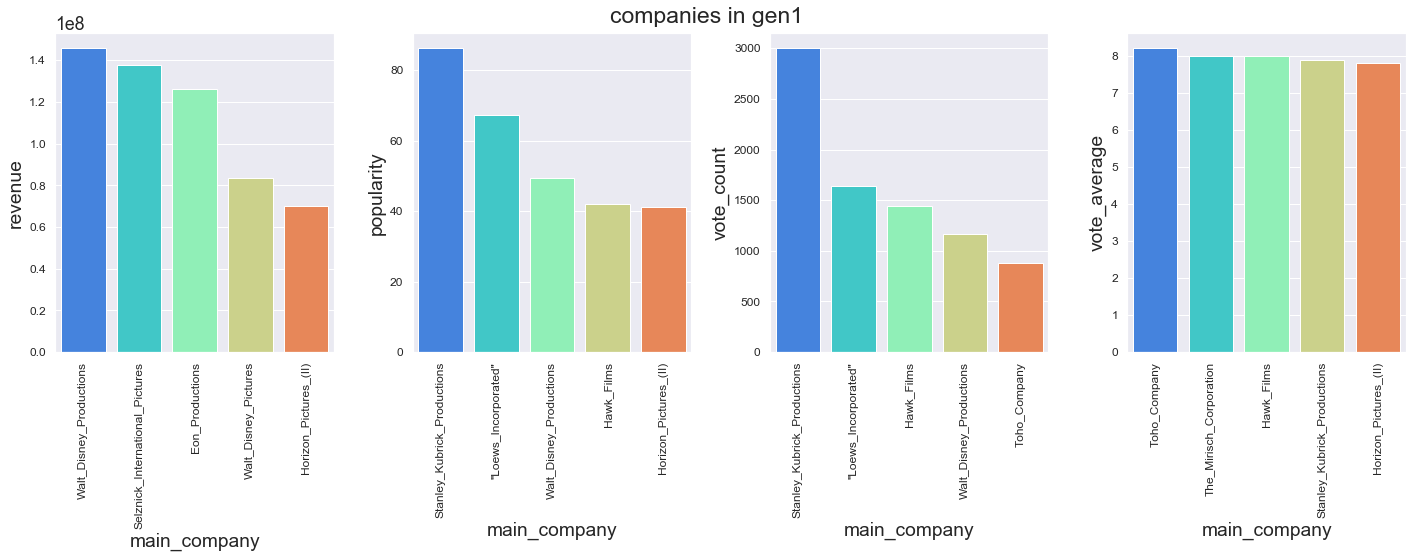

In [38]:
# <= 70 各类电影公司分布 票房

plt.subplots(figsize = (20, 8))
plt.suptitle('companies in gen1')
plt.subplot(1,4,1)
sns.barplot(y = 'revenue', x = 'main_company', data = gen1movies.groupby('main_company').mean().sort_values('revenue', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)

# <= 70 各类电影公司分布 popularity
plt.subplot(1,4,2)
sns.barplot(y = 'popularity', x = 'main_company', data = gen1movies.groupby('main_company').mean().sort_values('popularity', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)

# <= 70 各类电影公司分布 vote count
plt.subplot(1,4,3)
sns.barplot(y = 'vote_count', x = 'main_company', data = gen1movies.groupby('main_company').mean().sort_values('vote_count', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)

# <= 70 各类电影公司分布 vote average
plt.subplot(1,4,4)
sns.barplot(y = 'vote_average', x = 'main_company', data = gen1movies.groupby('main_company').mean().sort_values('vote_average', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('gen1.jpg')


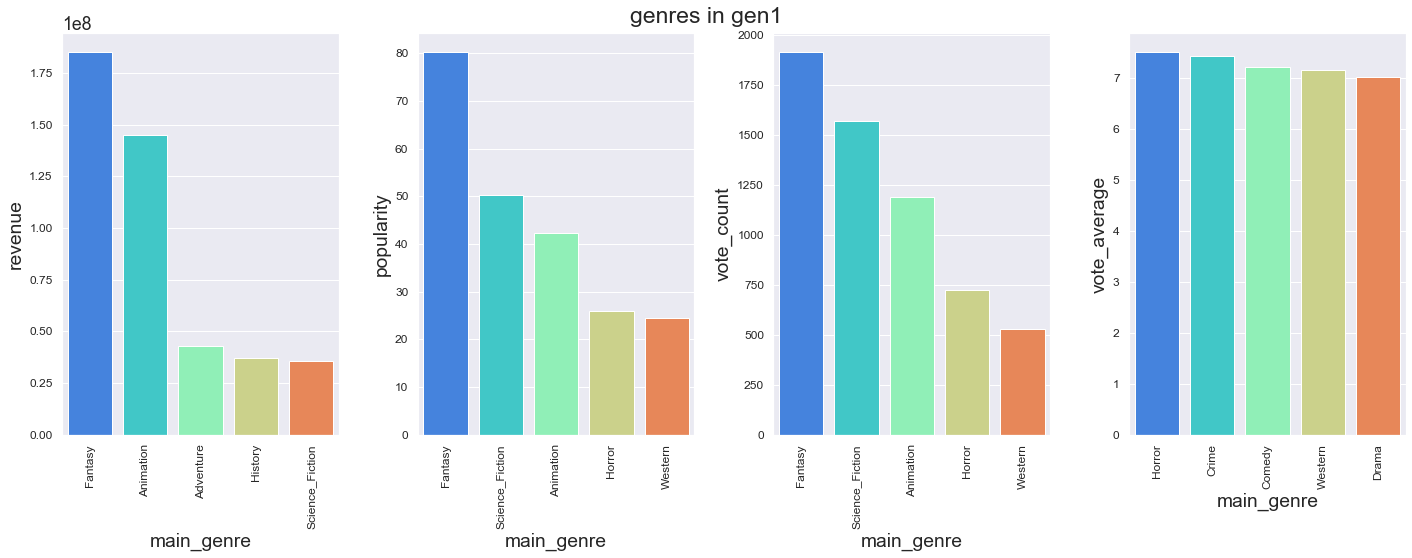

In [39]:
# <=70 各类电影公司分布 票房

plt.subplots(figsize = (20, 8))
plt.suptitle('genres in gen1')
plt.subplot(1,4,1)
sns.barplot(y = 'revenue', x = 'main_genre', data = gen1movies.groupby('main_genre').mean().sort_values('revenue', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# <=70 各类电影公司分布 popularity
plt.subplot(1,4,2)
sns.barplot(y = 'popularity', x = 'main_genre', data = gen1movies.groupby('main_genre').mean().sort_values('popularity', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# <=70 各类电影公司分布 vote count
plt.subplot(1,4,3)
sns.barplot(y = 'vote_count', x = 'main_genre', data = gen1movies.groupby('main_genre').mean().sort_values('vote_count', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# <=70 各类电影公司分布 vote average
plt.subplot(1,4,4)
sns.barplot(y = 'vote_average', x = 'main_genre', data = gen1movies.groupby('main_genre').mean().sort_values('vote_average', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('gen1genres.jpg')


In [40]:
# gen2mcom = gen2movies.groupby('main_company').mean().sort_values('revenue', ascending = False).head(5).reset_index()
# gen2mcom

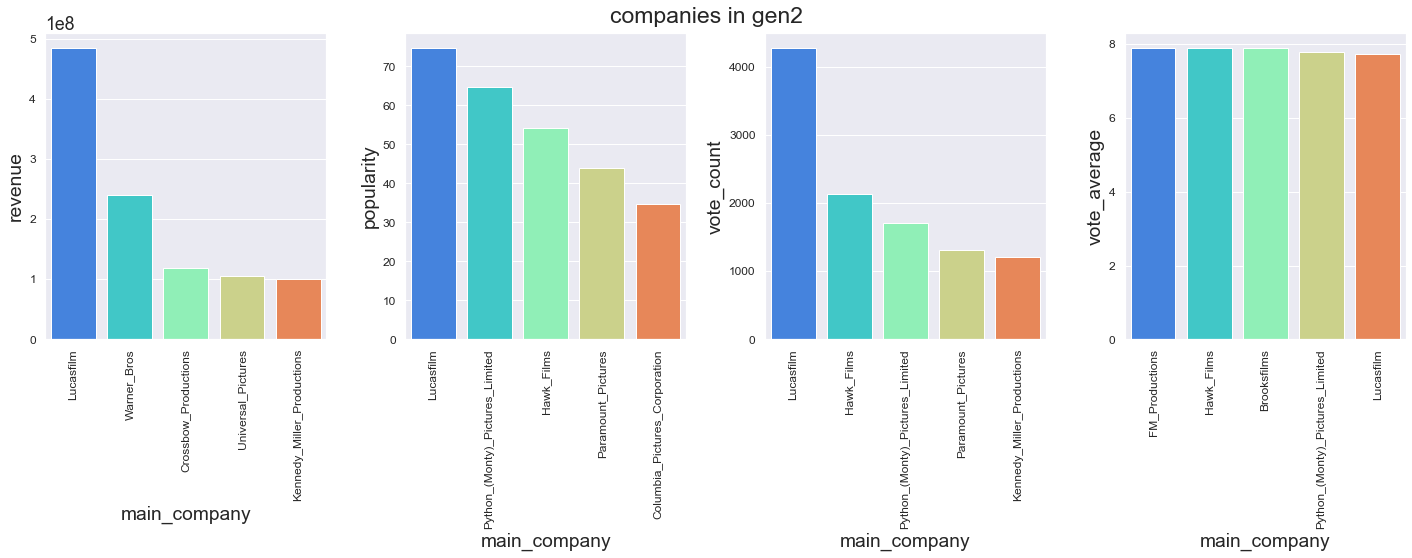

In [41]:
# 71-80 各类电影公司分布 票房

plt.subplots(figsize = (20, 8))
plt.suptitle('companies in gen2')
plt.subplot(1,4,1)
sns.barplot(y = 'revenue', x = 'main_company', data = gen2movies.groupby('main_company').mean().sort_values('revenue', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 71-80 各类电影公司分布 popularity
plt.subplot(1,4,2)
sns.barplot(y = 'popularity', x = 'main_company', data = gen2movies.groupby('main_company').mean().sort_values('popularity', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 71-80 各类电影公司分布 vote count
plt.subplot(1,4,3)
sns.barplot(y = 'vote_count', x = 'main_company', data = gen2movies.groupby('main_company').mean().sort_values('vote_count', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 71-80 各类电影公司分布 vote average
plt.subplot(1,4,4)
sns.barplot(y = 'vote_average', x = 'main_company', data = gen2movies.groupby('main_company').mean().sort_values('vote_average', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('gen2.jpg')


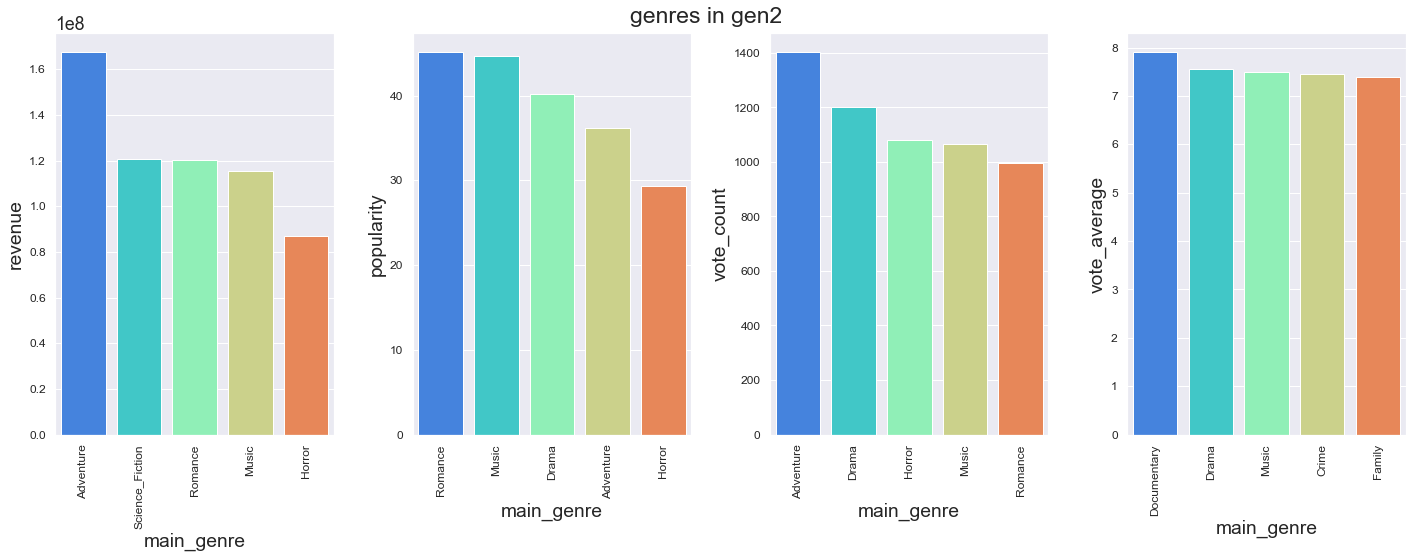

In [42]:
# 71-80 各类电影公司分布 票房

plt.subplots(figsize = (20, 8))
plt.suptitle('genres in gen2')
plt.subplot(1,4,1)
sns.barplot(y = 'revenue', x = 'main_genre', data = gen2movies.groupby('main_genre').mean().sort_values('revenue', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 71-80 各类电影公司分布 popularity
plt.subplot(1,4,2)
sns.barplot(y = 'popularity', x = 'main_genre', data = gen2movies.groupby('main_genre').mean().sort_values('popularity', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 71-80 各类电影公司分布 vote count
plt.subplot(1,4,3)
sns.barplot(y = 'vote_count', x = 'main_genre', data = gen2movies.groupby('main_genre').mean().sort_values('vote_count', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 71-80 各类电影公司分布 vote average
plt.subplot(1,4,4)
sns.barplot(y = 'vote_average', x = 'main_genre', data = gen2movies.groupby('main_genre').mean().sort_values('vote_average', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('gen2genres.jpg')


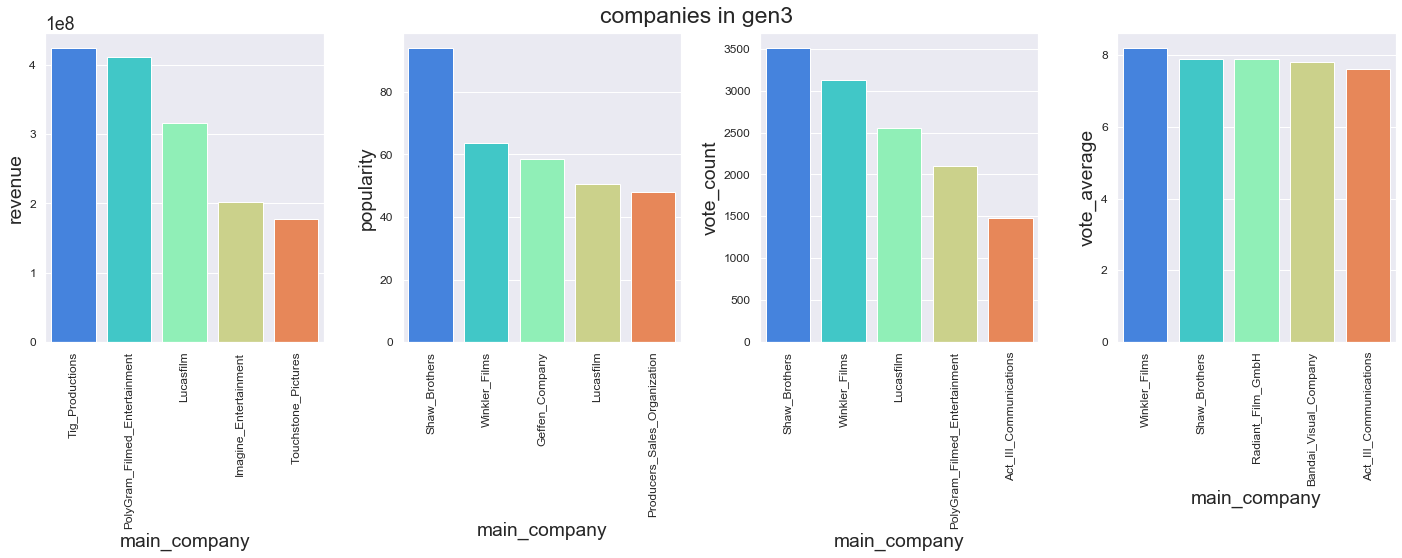

In [43]:
# 81-90 各类电影公司分布 票房

plt.subplots(figsize = (20, 8))
plt.suptitle('companies in gen3')
plt.subplot(1,4,1)
sns.barplot(y = 'revenue', x = 'main_company', data = gen3movies.groupby('main_company').mean().sort_values('revenue', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 81-90 各类电影公司分布 popularity
plt.subplot(1,4,2)
sns.barplot(y = 'popularity', x = 'main_company', data = gen3movies.groupby('main_company').mean().sort_values('popularity', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 81-90 各类电影公司分布 vote count
plt.subplot(1,4,3)
sns.barplot(y = 'vote_count', x = 'main_company', data = gen3movies.groupby('main_company').mean().sort_values('vote_count', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 81-90 各类电影公司分布 vote average
plt.subplot(1,4,4)
sns.barplot(y = 'vote_average', x = 'main_company', data = gen3movies.groupby('main_company').mean().sort_values('vote_average', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('gen3.jpg')


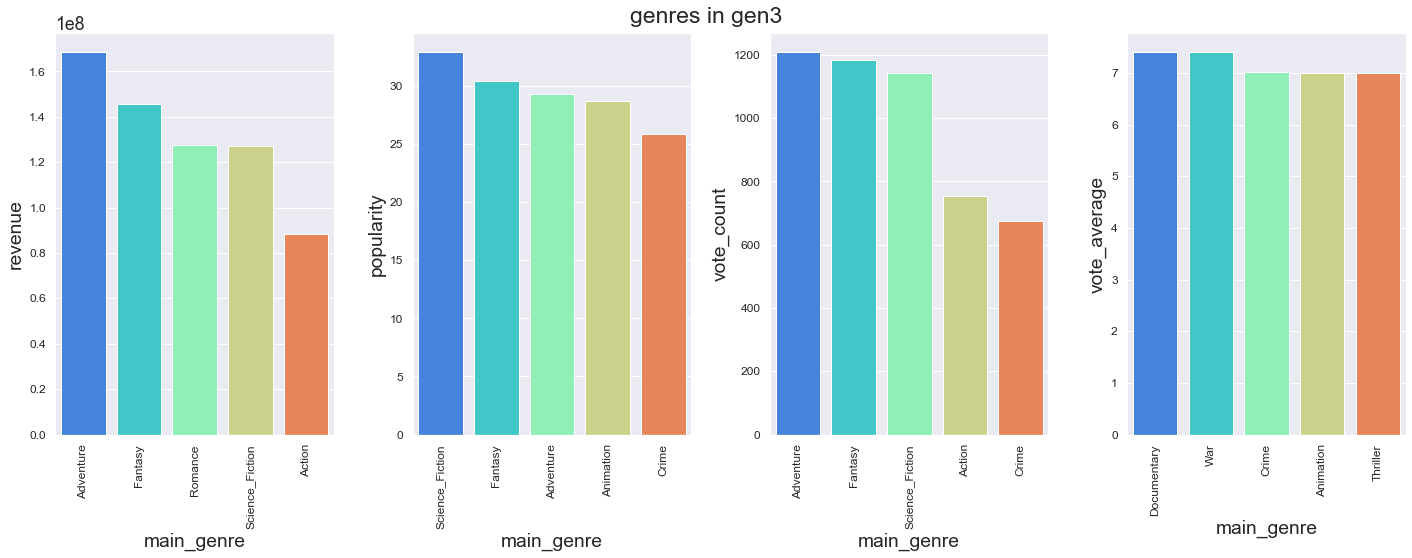

In [44]:
# gen3 各类电影公司分布 票房

plt.subplots(figsize = (20, 8))
plt.suptitle('genres in gen3')
plt.subplot(1,4,1)
sns.barplot(y = 'revenue', x = 'main_genre', data = gen3movies.groupby('main_genre').mean().sort_values('revenue', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# gen3 各类电影公司分布 popularity
plt.subplot(1,4,2)
sns.barplot(y = 'popularity', x = 'main_genre', data = gen3movies.groupby('main_genre').mean().sort_values('popularity', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# gen3 各类电影公司分布 vote count
plt.subplot(1,4,3)
sns.barplot(y = 'vote_count', x = 'main_genre', data = gen3movies.groupby('main_genre').mean().sort_values('vote_count', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# gen3 各类电影公司分布 vote average
plt.subplot(1,4,4)
sns.barplot(y = 'vote_average', x = 'main_genre', data = gen3movies.groupby('main_genre').mean().sort_values('vote_average', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('gen3genres.jpg')


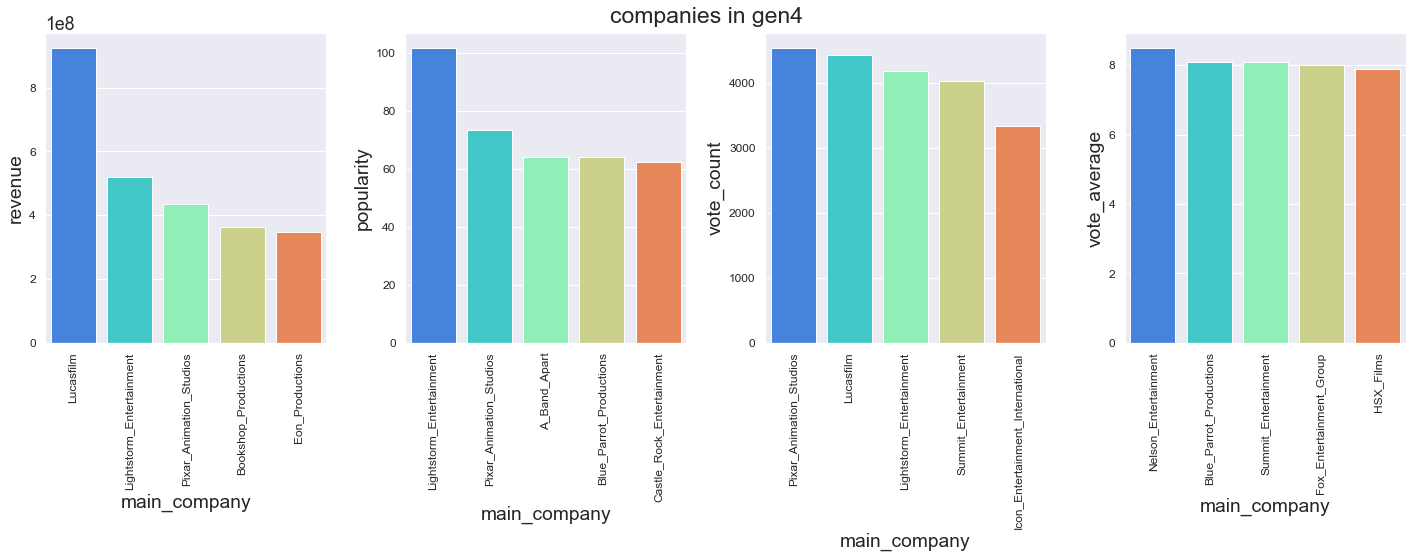

In [45]:
# 91-00 各类电影公司分布 票房

plt.subplots(figsize = (20, 8))
plt.suptitle('companies in gen4')
plt.subplot(1,4,1)
sns.barplot(y = 'revenue', x = 'main_company', data = gen4movies.groupby('main_company').mean().sort_values('revenue', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 91-00 各类电影公司分布 popularity
plt.subplot(1,4,2)
sns.barplot(y = 'popularity', x = 'main_company', data = gen4movies.groupby('main_company').mean().sort_values('popularity', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 91-00 各类电影公司分布 vote count
plt.subplot(1,4,3)
sns.barplot(y = 'vote_count', x = 'main_company', data = gen4movies.groupby('main_company').mean().sort_values('vote_count', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 91-00 各类电影公司分布 vote average
plt.subplot(1,4,4)
sns.barplot(y = 'vote_average', x = 'main_company', data = gen4movies.groupby('main_company').mean().sort_values('vote_average', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('gen4.jpg')


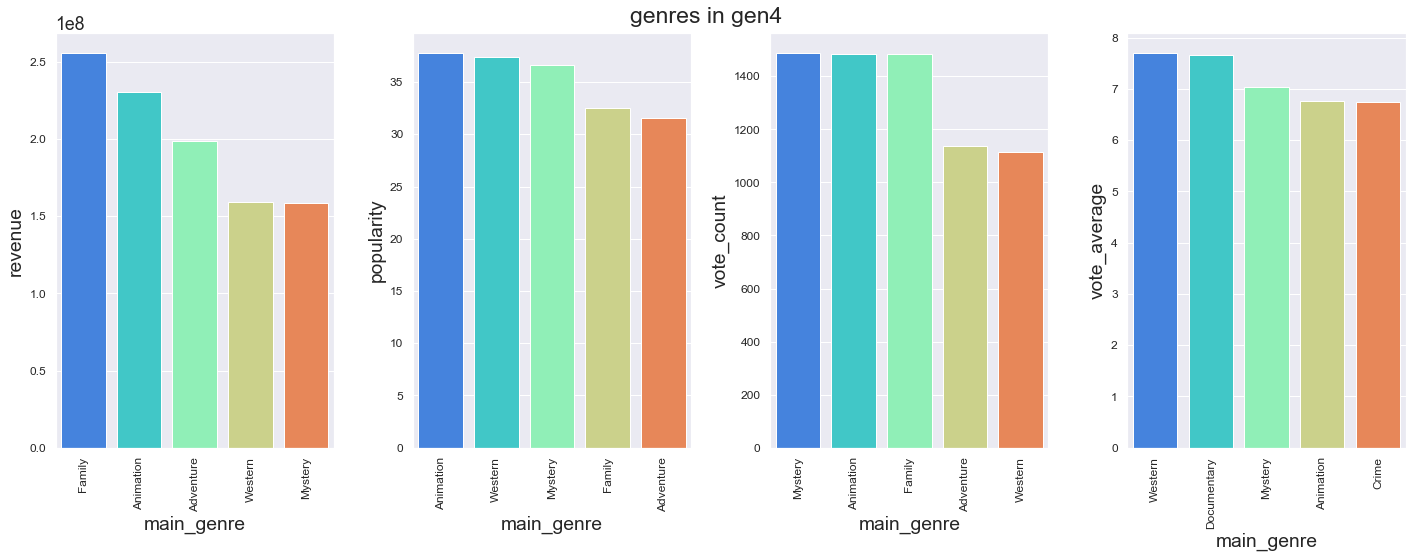

In [46]:
# gen4 各类电影公司分布 票房

plt.subplots(figsize = (20, 8))
plt.suptitle('genres in gen4')
plt.subplot(1,4,1)
sns.barplot(y = 'revenue', x = 'main_genre', data = gen4movies.groupby('main_genre').mean().sort_values('revenue', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# gen4 各类电影公司分布 popularity
plt.subplot(1,4,2)
sns.barplot(y = 'popularity', x = 'main_genre', data = gen4movies.groupby('main_genre').mean().sort_values('popularity', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# gen4 各类电影公司分布 vote count
plt.subplot(1,4,3)
sns.barplot(y = 'vote_count', x = 'main_genre', data = gen4movies.groupby('main_genre').mean().sort_values('vote_count', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# gen4 各类电影公司分布 vote average
plt.subplot(1,4,4)
sns.barplot(y = 'vote_average', x = 'main_genre', data = gen4movies.groupby('main_genre').mean().sort_values('vote_average', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('gen4genres.jpg')


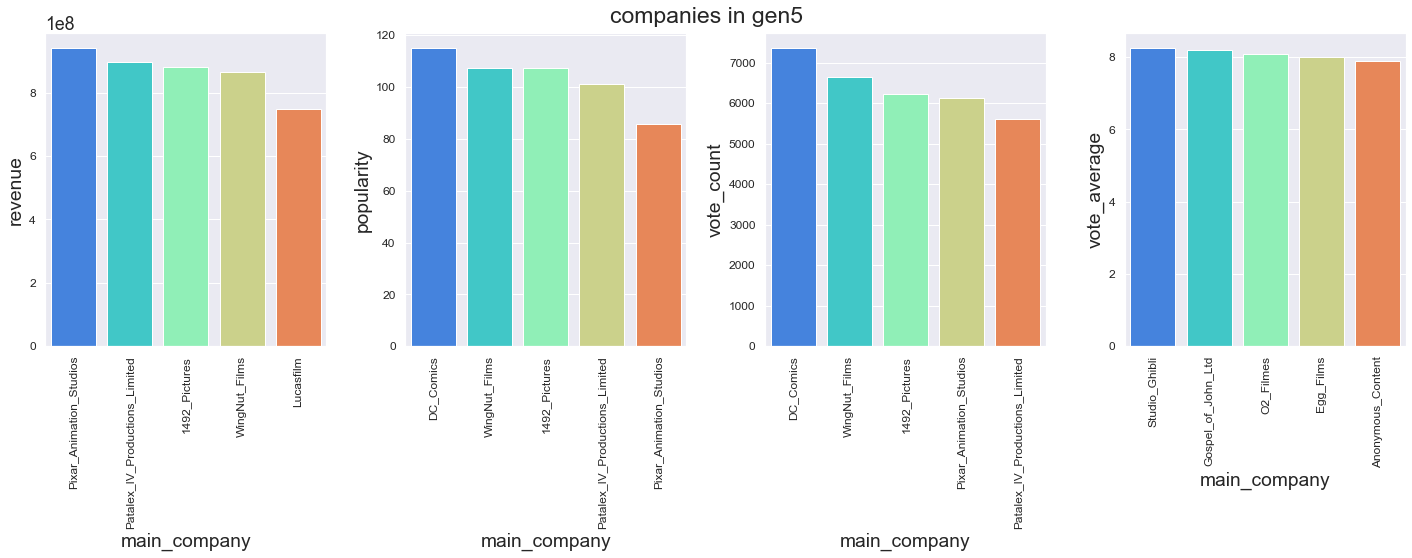

In [47]:
# 01-05 各类电影公司分布 票房

plt.subplots(figsize = (20, 8))
plt.suptitle('companies in gen5')
plt.subplot(1,4,1)
sns.barplot(y = 'revenue', x = 'main_company', data = gen5movies.groupby('main_company').mean().sort_values('revenue', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 01-05 各类电影公司分布 popularity
plt.subplot(1,4,2)
sns.barplot(y = 'popularity', x = 'main_company', data = gen5movies.groupby('main_company').mean().sort_values('popularity', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 01-05 各类电影公司分布 vote count
plt.subplot(1,4,3)
sns.barplot(y = 'vote_count', x = 'main_company', data = gen5movies.groupby('main_company').mean().sort_values('vote_count', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 01-05 各类电影公司分布 vote average
plt.subplot(1,4,4)
sns.barplot(y = 'vote_average', x = 'main_company', data = gen5movies.groupby('main_company').mean().sort_values('vote_average', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('gen5.jpg')


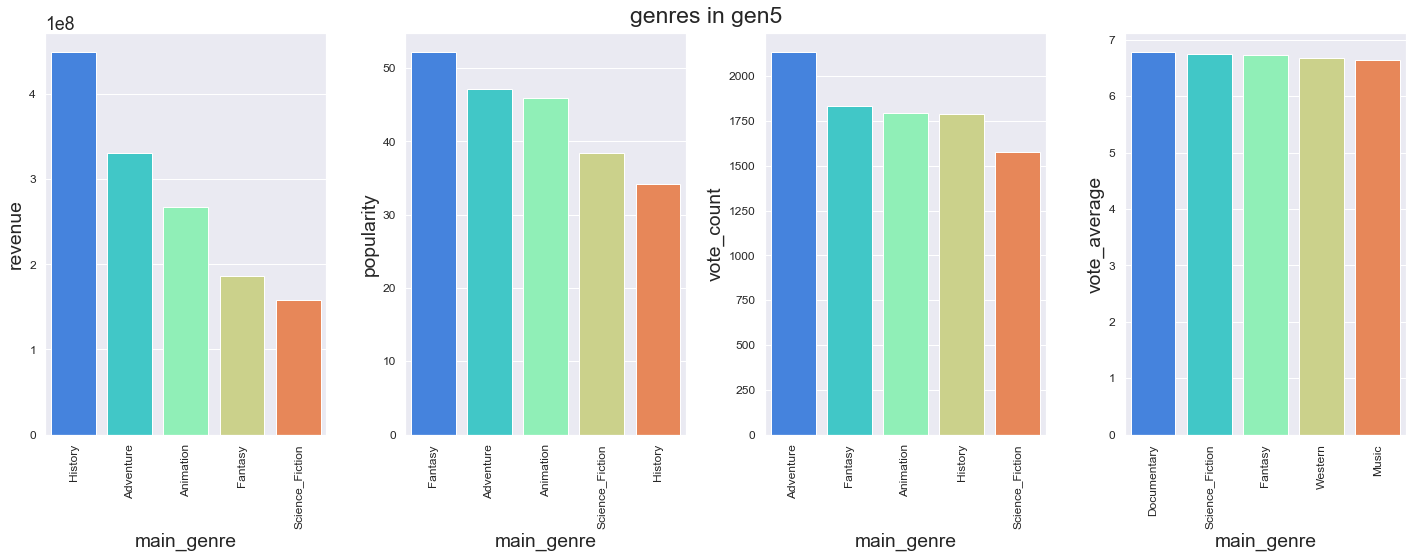

In [48]:
# gen5 各类电影公司分布 票房

plt.subplots(figsize = (20, 8))
plt.suptitle('genres in gen5')
plt.subplot(1,4,1)
sns.barplot(y = 'revenue', x = 'main_genre', data = gen5movies.groupby('main_genre').mean().sort_values('revenue', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# gen 5各类电影公司分布 popularity
plt.subplot(1,4,2)
sns.barplot(y = 'popularity', x = 'main_genre', data = gen5movies.groupby('main_genre').mean().sort_values('popularity', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# gen5 各类电影公司分布 vote count
plt.subplot(1,4,3)
sns.barplot(y = 'vote_count', x = 'main_genre', data = gen5movies.groupby('main_genre').mean().sort_values('vote_count', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# gen5 各类电影公司分布 vote average
plt.subplot(1,4,4)
sns.barplot(y = 'vote_average', x = 'main_genre', data = gen5movies.groupby('main_genre').mean().sort_values('vote_average', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('gen5genres.jpg')


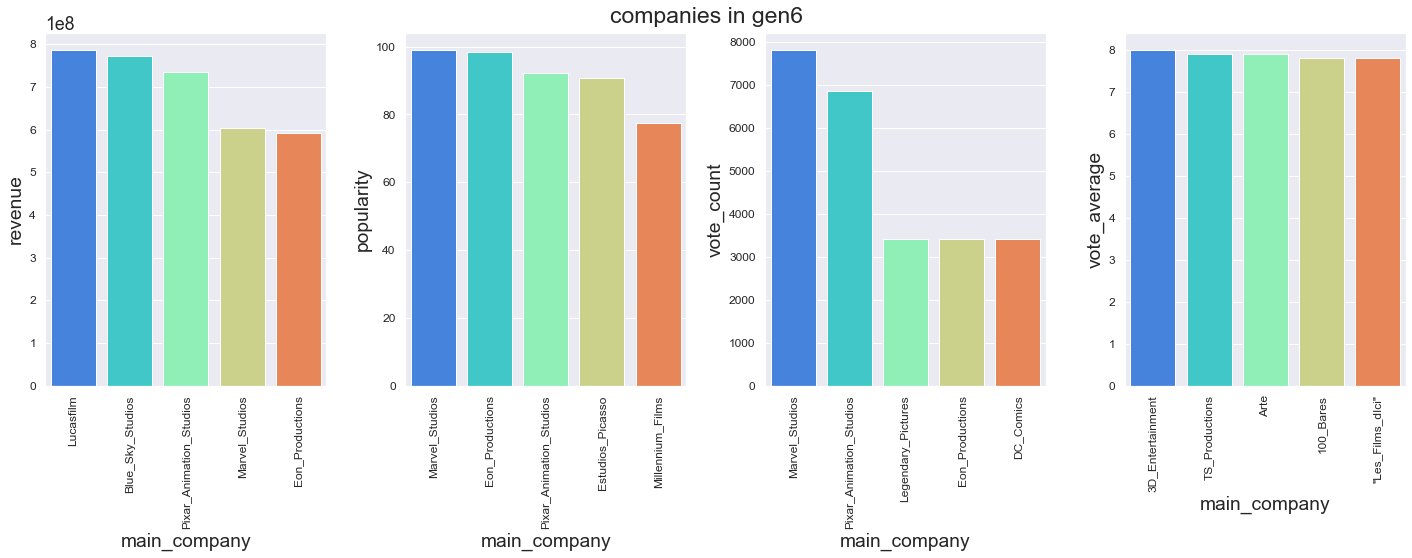

In [49]:
# 06-10 各类电影公司分布 票房

plt.subplots(figsize = (20, 8))
plt.suptitle('companies in gen6')
plt.subplot(1,4,1)
sns.barplot(y = 'revenue', x = 'main_company', data = gen6movies.groupby('main_company').mean().sort_values('revenue', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 06-10 各类电影公司分布 popularity
plt.subplot(1,4,2)
sns.barplot(y = 'popularity', x = 'main_company', data = gen6movies.groupby('main_company').mean().sort_values('popularity', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 06-10 各类电影公司分布 vote count
plt.subplot(1,4,3)
sns.barplot(y = 'vote_count', x = 'main_company', data = gen6movies.groupby('main_company').mean().sort_values('vote_count', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 06-10 各类电影公司分布 vote average
plt.subplot(1,4,4)
sns.barplot(y = 'vote_average', x = 'main_company', data = gen6movies.groupby('main_company').mean().sort_values('vote_average', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('gen6.jpg')


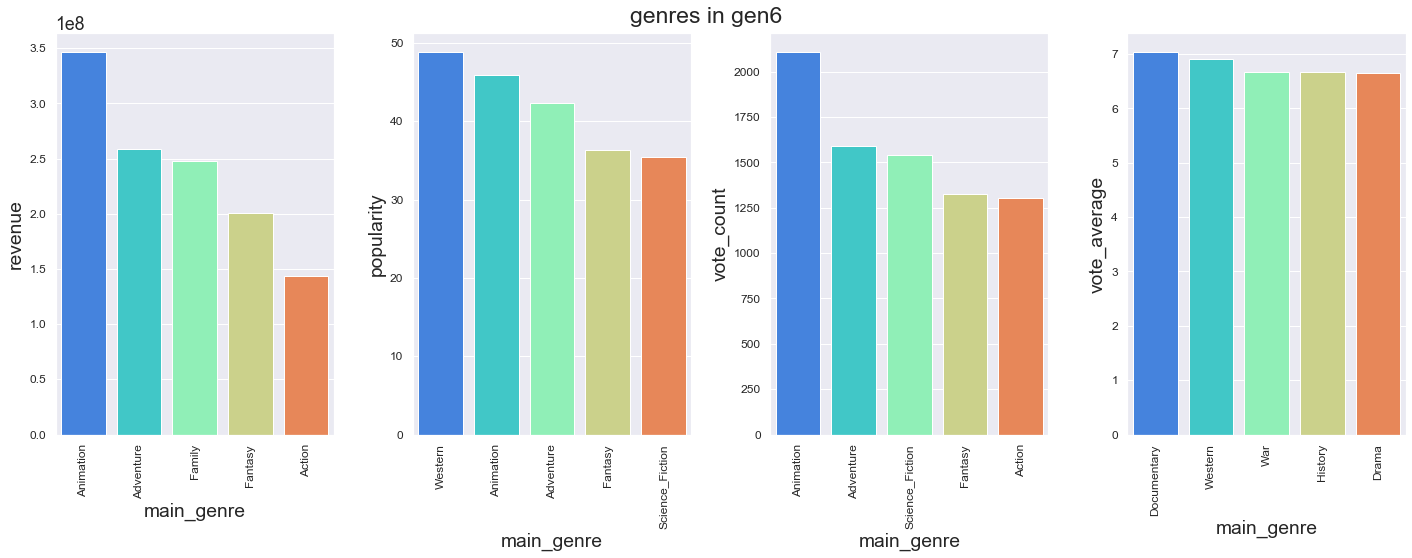

In [50]:
# gen6 各类电影公司分布 票房

plt.subplots(figsize = (20, 8))
plt.suptitle('genres in gen6')
plt.subplot(1,4,1)
sns.barplot(y = 'revenue', x = 'main_genre', data = gen6movies.groupby('main_genre').mean().sort_values('revenue', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# gen6 各类电影公司分布 popularity
plt.subplot(1,4,2)
sns.barplot(y = 'popularity', x = 'main_genre', data = gen6movies.groupby('main_genre').mean().sort_values('popularity', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# gen6 各类电影公司分布 vote count
plt.subplot(1,4,3)
sns.barplot(y = 'vote_count', x = 'main_genre', data = gen6movies.groupby('main_genre').mean().sort_values('vote_count', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# gen6 各类电影公司分布 vote average
plt.subplot(1,4,4)
sns.barplot(y = 'vote_average', x = 'main_genre', data = gen6movies.groupby('main_genre').mean().sort_values('vote_average', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('gen6genres.jpg')


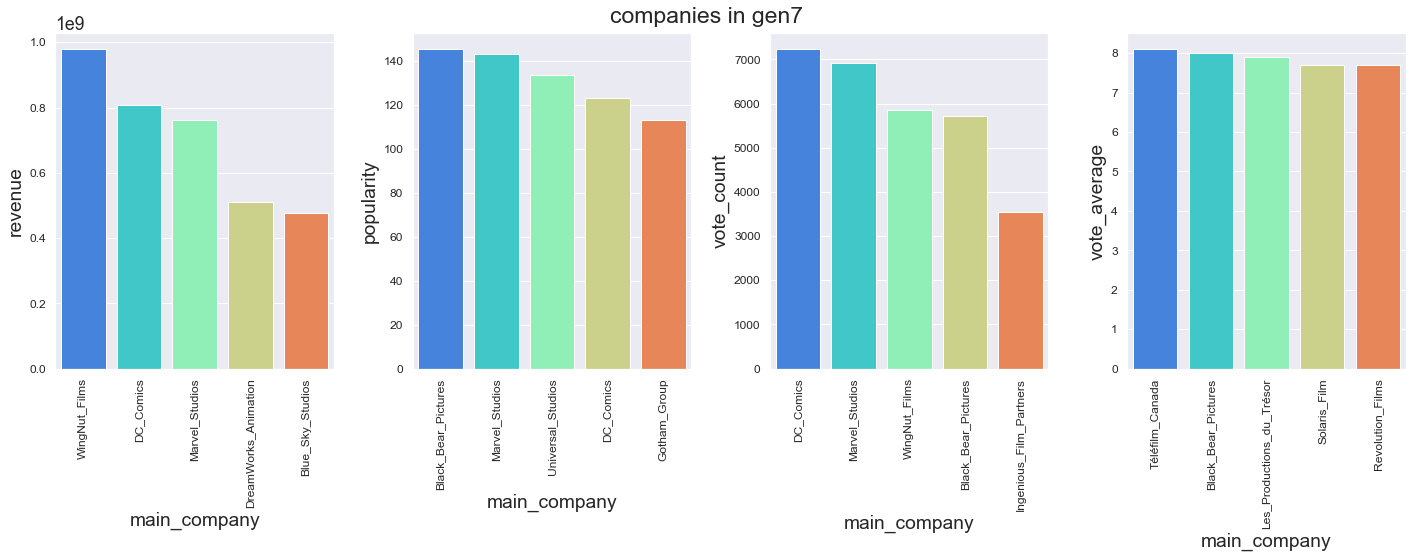

In [51]:
# 11-16 各类电影公司分布 票房

plt.subplots(figsize = (20, 8))
plt.suptitle('companies in gen7')
plt.subplot(1,4,1)
sns.barplot(y = 'revenue', x = 'main_company', data = gen7movies.groupby('main_company').mean().sort_values('revenue', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 11-16 各类电影公司分布 popularity
plt.subplot(1,4,2)
sns.barplot(y = 'popularity', x = 'main_company', data = gen7movies.groupby('main_company').mean().sort_values('popularity', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 11-16 各类电影公司分布 vote count
plt.subplot(1,4,3)
sns.barplot(y = 'vote_count', x = 'main_company', data = gen7movies.groupby('main_company').mean().sort_values('vote_count', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# 11-16 各类电影公司分布 vote average
plt.subplot(1,4,4)
sns.barplot(y = 'vote_average', x = 'main_company', data = gen7movies.groupby('main_company').mean().sort_values('vote_average', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('gen7.jpg')


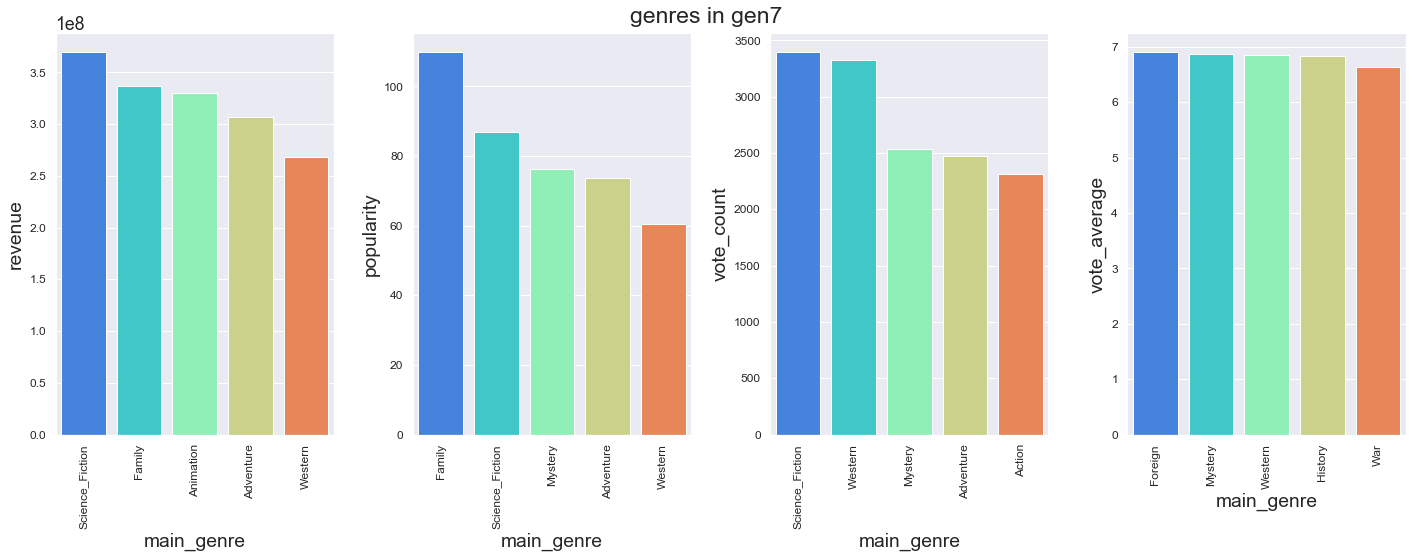

In [52]:
# gen7 各类电影公司分布 票房

plt.subplots(figsize = (20, 8))
plt.suptitle('genres in gen7')
plt.subplot(1,4,1)
sns.barplot(y = 'revenue', x = 'main_genre', data = gen7movies.groupby('main_genre').mean().sort_values('revenue', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# gen7 各类电影公司分布 popularity
plt.subplot(1,4,2)
sns.barplot(y = 'popularity', x = 'main_genre', data = gen7movies.groupby('main_genre').mean().sort_values('popularity', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# gen7 各类电影公司分布 vote count
plt.subplot(1,4,3)
sns.barplot(y = 'vote_count', x = 'main_genre', data = gen7movies.groupby('main_genre').mean().sort_values('vote_count', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
# gen7 各类电影公司分布 vote average
plt.subplot(1,4,4)
sns.barplot(y = 'vote_average', x = 'main_genre', data = gen7movies.groupby('main_genre').mean().sort_values('vote_average', ascending = False).head(5).reset_index(), palette = 'rainbow')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('gen7genres.jpg')


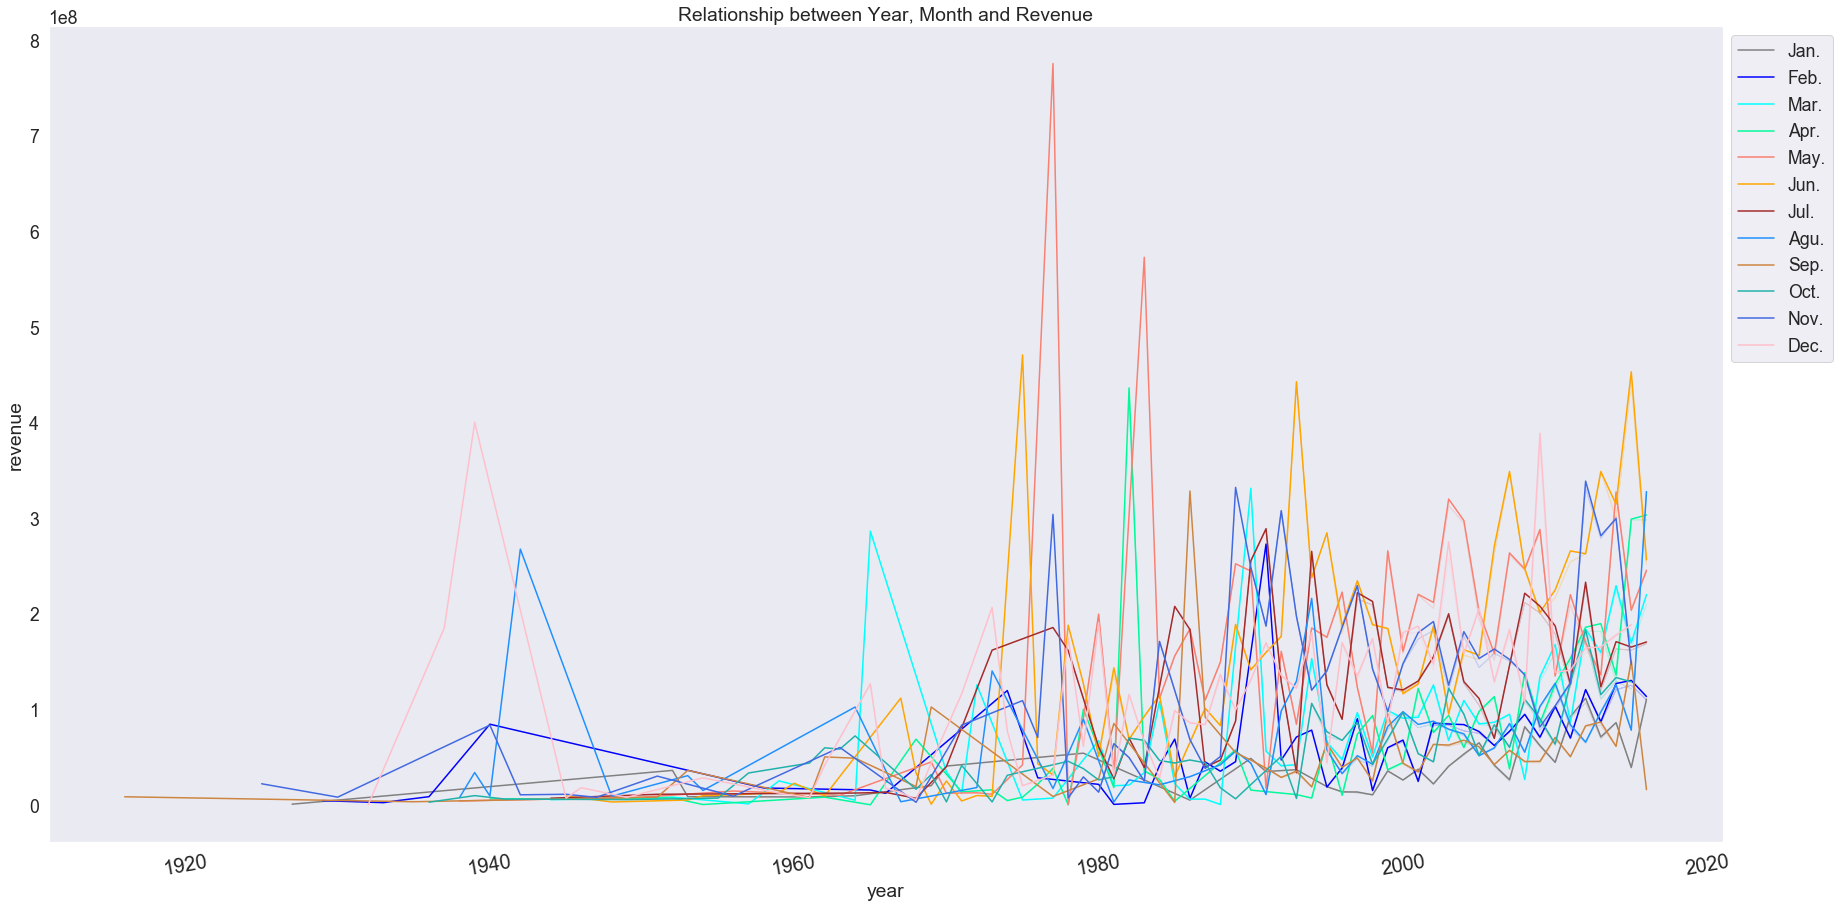

In [53]:
# 月份 票房 总表
plt.subplots(figsize = (30, 15))

sns.lineplot(x = 'year', y = 'revenue', data = movies[movies.month == 1], ci = 0, label = 'Jan.', color = 'grey')
sns.lineplot(x = 'year', y = 'revenue', data = movies[movies.month == 2], ci = 0, label = 'Feb.', color = 'blue')
sns.lineplot(x = 'year', y = 'revenue', data = movies[movies.month == 3], ci = 0, label = 'Mar.', color = 'aqua')
sns.lineplot(x = 'year', y = 'revenue', data = movies[movies.month == 4], ci = 0, label = 'Apr.', color = 'mediumspringgreen')
sns.lineplot(x = 'year', y = 'revenue', data = movies[movies.month == 5], ci = 0, label = 'May.', color = 'salmon')
sns.lineplot(x = 'year', y = 'revenue', data = movies[movies.month == 6], ci = 0, label = 'Jun.', color = 'orange')
sns.lineplot(x = 'year', y = 'revenue', data = movies[movies.month == 7], ci = 0, label = 'Jul.', color = 'brown')
sns.lineplot(x = 'year', y = 'revenue', data = movies[movies.month == 8], ci = 0, label = 'Agu.', color = 'dodgerblue' )
sns.lineplot(x = 'year', y = 'revenue', data = movies[movies.month == 9], ci = 0, label = 'Sep.', color = 'peru')
sns.lineplot(x = 'year', y = 'revenue', data = movies[movies.month == 10], ci = 0, label = 'Oct.', color = 'lightseagreen')
sns.lineplot(x = 'year', y = 'revenue', data = movies[movies.month == 11], ci = 0, label = 'Nov.', color = 'royalblue')
sns.lineplot(x = 'year', y = 'revenue', data = movies[movies.month == 12], ci = 0, label = 'Dec.', color = 'pink').set_title('Relationship between Year, Month and Revenue')
plt.xticks(rotation=10, fontsize = 20)
plt.legend(bbox_to_anchor = (1, 1), loc = 2)
plt.grid()
plt.savefig('relation_year_revenue_month.jpg')

In [54]:
movies.groupby('main_company').mean().sort_values('revenue', ascending = False).head(5).reset_index()

,main_company,budget,popularity,revenue,vote_average,vote_count,language,year,month,generation,difference,ifProfitable
0,Patalex_IV_Productions_Limited,150000000.0,101.250416,8.959210e+08,7.500,5608.00,0.0,2005.0,11.00,5.00,7.459210e+08,1.0
1,Marvel_Studios,175000000.0,134.390332,7.301826e+08,7.060,7091.10,0.0,2012.4,5.40,6.80,5.551826e+08,1.0
2,1492_Pictures,111250000.0,90.580987,7.043868e+08,7.125,5086.50,0.0,2005.0,8.75,5.50,5.931368e+08,1.0
3,WingNut_Films,132300000.0,85.515415,6.709462e+08,7.330,4891.50,0.0,2006.2,11.20,5.70,5.386462e+08,0.9
4,Pixar_Animation_Studios,97250000.0,81.276578,6.365889e+08,7.575,5516.75,0.0,2001.5,7.50,4.75,5.393389e+08,1.0


In [55]:
movies.mean()

budget          4.102961e+07
popularity      2.870470e+01
revenue         1.189528e+08
vote_average    6.316842e+00
vote_count      9.602022e+02
language        4.188008e-02
year            2.001830e+03
month           6.983127e+00
generation      5.172341e+00
difference      7.792320e+07
ifProfitable    7.381741e-01
dtype: float64

In [56]:
movies.groupby('main_genre').mean().sort_values('revenue', ascending = False).head(5).reset_index()

,main_genre,budget,popularity,revenue,vote_average,vote_count,language,year,month,generation,difference,ifProfitable
0,Animation,8.386533e+07,42.270451,3.033565e+08,6.428571,1629.683673,0.051020,2005.448980,7.183673,5.775510,2.194912e+08,0.836735
1,Adventure,7.509671e+07,44.374654,2.455996e+08,6.389003,1667.151203,0.041237,1999.601375,7.285223,4.865979,1.705028e+08,0.797251
2,Family,6.133808e+07,50.674237,2.289083e+08,6.117949,1076.923077,0.025641,2005.000000,7.051282,5.564103,1.675702e+08,0.769231
3,Science_Fiction,5.820589e+07,48.401536,1.997302e+08,6.307407,1835.469136,0.037037,2001.333333,6.703704,5.074074,1.415243e+08,0.802469
4,Fantasy,6.285752e+07,39.293777,1.779838e+08,6.238144,1311.319588,0.082474,2002.938144,6.659794,5.268041,1.151263e+08,0.845361


In [57]:
movies.loc[(movies.generation == 7) & (movies.ifProfitable == 0)].count()

budget               198
original_language    198
movie_title          198
popularity           198
revenue              198
vote_average         198
vote_count           198
actors               198
director             198
language             198
year                 198
month                198
generation           198
main_country         198
main_genre           198
main_company         198
difference           198
ifProfitable         198
dtype: int64

In [58]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3319 entries, 0 to 4798
Data columns (total 18 columns):
budget               3319 non-null int64
original_language    3319 non-null object
movie_title          3319 non-null object
popularity           3319 non-null float64
revenue              3319 non-null int64
vote_average         3319 non-null float64
vote_count           3319 non-null int64
actors               3319 non-null object
director             3319 non-null object
language             3319 non-null int64
year                 3319 non-null int64
month                3319 non-null int64
generation           3319 non-null int64
main_country         3319 non-null object
main_genre           3319 non-null object
main_company         3319 non-null object
difference           3319 non-null int64
ifProfitable         3319 non-null int64
dtypes: float64(2), int64(9), object(7)
memory usage: 652.7+ KB
